# Data Preparation

## Importing Stage

In [706]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.graph_objects as go
import plotly.express as px
from jdcal import gcal2jd

In [707]:
df = pd.read_csv('../data/Global YouTube Statistics.csv', sep=',', header=0, encoding='latin1')

## First Glance at the Data

In [709]:
df.head()

rank                    Youtuber  subscribers     video views  \
0     1                    T-Series    245000000 228,000,000,000   
1     2              YouTube Movies    170000000               0   
2     3                     MrBeast    166000000  28,368,841,870   
3     4  Cocomelon - Nursery Rhymes    162000000 164,000,000,000   
4     5                   SET India    159000000 148,000,000,000   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0           IN          Music  ...                     2,000,000   
1           US          Games  ...                           NaN   
2           US  Entertainment  ...                     8,000,000   
3           US      Education  ...                     1,000,000   
4           IN  Entertainment  ...                     1,000,000   

   created_year  created_month  created_date  \
0         2,006            Mar            13   
1         2,006            Mar             5   
2         2,012            Feb            20   
3         2,006            Sep             1   
4         2,006            Sep            20   

   Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                       28 1,366,417,754                  5   
1                                       88   328,239,523                 15   
2                                       88   328,239,523                 15   
3                                       88   328,239,523                 15   
4                                       28 1,366,417,754                  5   

   Urban_population  Latitude  Longitude  
0       471,031,528        21         79  
1       270,663,028        37        -96  
2       270,663,028        37        -96  
3       270,663,028        37        -96  
4       471,031,528        21         79  

[5 rows x 28 columns]

In [710]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

## Dropping and Remaking Faulty Rank Columns

In [712]:
# Delete the faulty 'video_views_rank' column
df.drop(columns=['rank'], inplace=True)

# Sort by 'video_views' in descending order and assign rank
df['subs_rank'] = df['video views'].rank(ascending=False, method='min').astype(int)

# Delete the faulty 'video_views_rank' column
df.drop(columns=['video_views_rank'], inplace=True)

# Sort by 'video_views' in descending order and assign rank
df['channel_views_rank'] = df['video views'].rank(ascending=False, method='min').astype(int)

## Data Cleansing

In [714]:
# Guidelines:
# Categorical/String Data = Unknown
# Numerical Data = 0
# Year placeholder = 9999, Date (day) placeholder = 0
# Latitude and Longitude = No Data

def clean_data(df):

    #Setting up special cases on some columns
    fill_values = {
        'created_month': 'Dec',
        'created_year': 9999, #Highest year upported by pandas
        'created_date': 31,
        'Latitude': 'No Data',
        'Longitude': 'No Data',
        'subscribers_for_last_30_days': 0,
        'video_views_for_the_last_30_days': 0
    }
    for column, value in fill_values.items():
        if column in df.columns:
            df[column] = df[column].fillna(value) #Fill the NAs with values from fill_values

    #Now we fill NAs according to "Guidelines" above
    for column in df.columns:
    
            # integer
            if df[column].dtype == "int":
                df[column] = df[column].fillna(0)
    
            # boolean
            elif df[column].dtype == 'bool':
                df[column] = df[column].fillna(False)
    
            # string / categorical
            else:
                df[column] = df[column].fillna('Unknown')
    
    return df

## Applying Data Cleansing & Verification

In [716]:
# Apply the cleaning function to your DataFrame
df_cleaned = clean_data(df)

# Verify if the NaN values are handled
print(df_cleaned.isna().sum())


Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tertiary education enrollment (%)    0
Population                                 0
Unemployme

## Output the Cleaned Data

In [718]:
# stored at ../data Folder
df_cleaned.to_csv('../data/Cleaned Global YouTube Statistics.csv', sep=',', encoding='latin1')

# Exploring Trend Data

## Which channel has the most subscriber?

In [729]:
# Find 10 rows
top_10_subs = df_cleaned.head(n=10)[['subs_rank','Youtuber','subscribers']]

# Print without index
print(top_10_subs.to_string(index=False))

 subs_rank                   Youtuber  subscribers
         1                   T-Series    245000000
       988             YouTube Movies    170000000
        50                    MrBeast    166000000
         2 Cocomelon - Nursery Rhymes    162000000
         3                  SET India    159000000
       988                      Music    119000000
         5        ýýý Kids Diana Show    112000000
        44                  PewDiePie    111000000
         6                Like Nastya    106000000
         8              Vlad and Niki     98900000


<Axes: xlabel='subscribers', ylabel='Youtuber'>

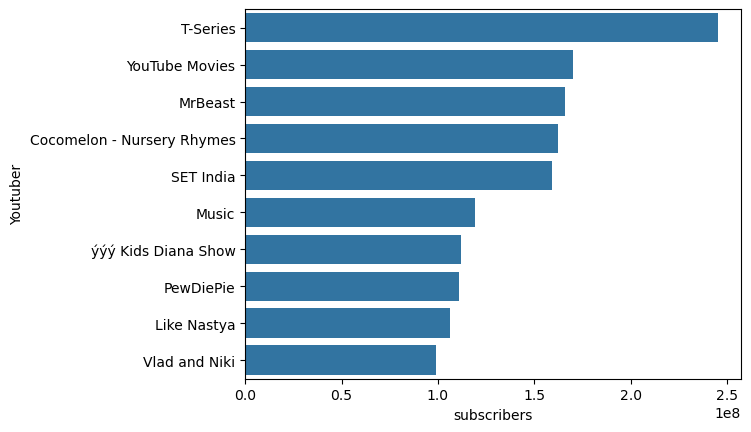

In [730]:
sns.barplot(top_10_subs, x="subscribers", y="Youtuber", orient="y")

In [731]:
# Here we can see T-Series as the Youtube Channel with the most subcsriber number, following with Youtube Movies and MrBeast as 2nd and 3rd highest.

## Which channel has the highest accumulated total of views?

In [733]:
# Ensure video views are treated as integers to avoid formatting issues
df['video views'] = df['video views'].astype('int64')

# Prevent scientific notation for large numbers
pd.set_option('display.float_format', '{:,.0f}'.format)

# Find top 10 rows with the highest subscriber count
top_10_view = df_cleaned.nlargest(10, 'video views')[['channel_views_rank','Youtuber','video views']]

# Print without index
print(top_10_view.to_string(index=False))

 channel_views_rank                   Youtuber  video views
                  1                   T-Series 228000000000
                  2 Cocomelon - Nursery Rhymes 164000000000
                  3                  SET India 148000000000
                  4                   Sony SAB 101000000000
                  5        ýýý Kids Diana Show  93247040539
                  6                Like Nastya  90479060027
                  7                        WWE  77428473662
                  8              Vlad and Niki  77180169894
                  9                     Zee TV  73139054467
                 10                  Colors TV  61510906457


<Axes: xlabel='video views', ylabel='Youtuber'>

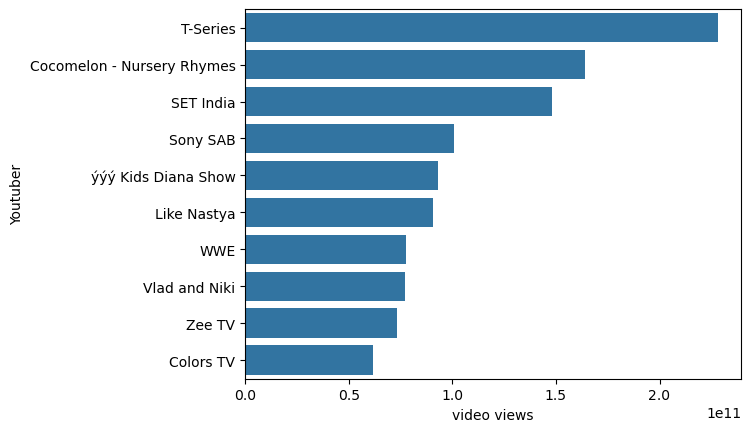

In [734]:
sns.barplot(top_10_view, x="video views", y="Youtuber", orient="y")

In [735]:
# As we can see here, contrary to the subscriber count rank, the channel_view_rank here has a slight difference where T-Series is still on the top but 
# Cocomelon and SET India holding the 2nd and 3rd top position on channel_view_rank

## Which channel uploaded videos the most?

In [737]:
# Prevent scientific notation for large numbers
pd.set_option('display.float_format', '{:,.0f}'.format)

# Find top 10 rows with the highest subscriber count
top_10_uploads = df_cleaned.nlargest(10, 'uploads')[['Youtuber','uploads']]

# Print without index
print(top_10_uploads.to_string(index=False))

           Youtuber  uploads
           ABP NEWS   301308
GMA Integrated News   296272
    TV9 Bharatvarsh   293516
            Aaj Tak   283775
            IndiaTV   273255
           KOMPASTV   269050
    Thairath Online   244899
            News 24   211620
       ABS-CBN News   209520
         TEDx Talks   200933


<Axes: xlabel='uploads', ylabel='Youtuber'>

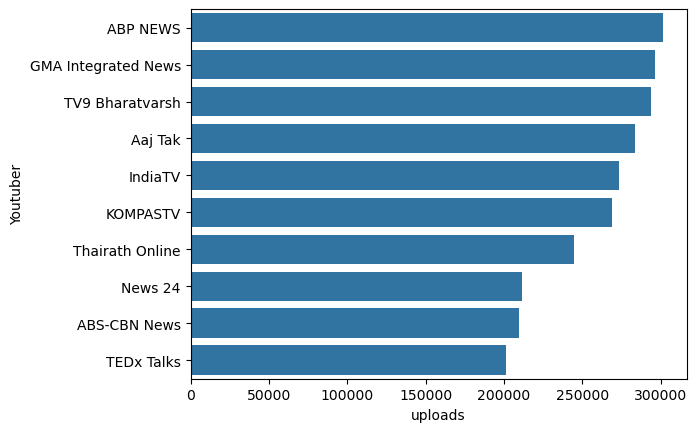

In [738]:
sns.barplot(top_10_uploads, x="uploads", y="Youtuber", orient="y")

In [739]:
# The channel with the highest amount of uploads is ABP News, followed by GMA Integrated News and TV9 Bharatvarsh as 2nd and 3rd position.

## Which channel has the biggest MoM growth?

### Principles

In [742]:
# MoM Subscribers Growth = ( ( Current Month Total Subscribers - Previous Month Total Subcribers ) / Previous Month Total Subcribers ) * 100

# The column of subscribers_for_last_30_days has already calculated ( Current Month Total Subscriber - Previous Month Total Subcriber ) so we just need to:
# 1. Find delta_subscribers which is Previous Month Total Subcriber with formula: subscribers - subscribers_for_last_30_days
# 2. Afterwards, we can do subscribers_for_last_30_days / delta_subscribers * 100

# MoM Viewers Growth = ( ( Current Month Total Views - Previous Month Total Views ) / Previous Month Total Views ) * 100

# The rest of the columns on Views side work with the same principles with the Subscribers side

### MoM Subscribers Growth

In [744]:
# Quick Glance

df_cleaned[['Youtuber','subscribers','subscribers_for_last_30_days']]

Youtuber  subscribers  subscribers_for_last_30_days
0                      T-Series    245000000                     2,000,000
1                YouTube Movies    170000000                             0
2                       MrBeast    166000000                     8,000,000
3    Cocomelon - Nursery Rhymes    162000000                     1,000,000
4                     SET India    159000000                     1,000,000
..                          ...          ...                           ...
990               Natan por Aï¿     12300000                       700,000
991    Free Fire India Official     12300000                       300,000
992                       Panda     12300000                         1,000
993                 RobTopGames     12300000                       100,000
994                Make Joke Of     12300000                       100,000

[995 rows x 3 columns]

In [745]:
# Find delta_subscribers which is Previous Month Total Subcriber with formula: subscribers - subscribers_for_last_30_days

df_cleaned['delta_subscribers']=df_cleaned['subscribers']-df_cleaned['subscribers_for_last_30_days']

In [746]:
# Checking to see if the new column successfully made

df_cleaned[['Youtuber','subscribers','subscribers_for_last_30_days','delta_subscribers']]

Youtuber  subscribers  subscribers_for_last_30_days  \
0                      T-Series    245000000                     2,000,000   
1                YouTube Movies    170000000                             0   
2                       MrBeast    166000000                     8,000,000   
3    Cocomelon - Nursery Rhymes    162000000                     1,000,000   
4                     SET India    159000000                     1,000,000   
..                          ...          ...                           ...   
990               Natan por Aï¿     12300000                       700,000   
991    Free Fire India Official     12300000                       300,000   
992                       Panda     12300000                         1,000   
993                 RobTopGames     12300000                       100,000   
994                Make Joke Of     12300000                       100,000   

     delta_subscribers  
0          243,000,000  
1          170,000,000  
2          158,000,000  
3          161,000,000  
4          158,000,000  
..                 ...  
990         11,600,000  
991         12,000,000  
992         12,299,000  
993         12,200,000  
994         12,200,000  

[995 rows x 4 columns]

In [747]:
# Afterwards, we can do subscribers_for_last_30_days / delta_subscribers * 100

df_cleaned['mom_subscribers_growth']= ( df_cleaned['subscribers_for_last_30_days'] / df_cleaned['delta_subscribers'] ) * 100

# Make a new column to present it as percentage
df_cleaned['mom_subscribers_growth_percent'] = df_cleaned['mom_subscribers_growth'].astype(str) + '%'

# Checking if it's successfully made correctly
df_cleaned[['Youtuber','subscribers','subscribers_for_last_30_days','delta_subscribers','mom_subscribers_growth_percent']]

Youtuber  subscribers  subscribers_for_last_30_days  \
0                      T-Series    245000000                     2,000,000   
1                YouTube Movies    170000000                             0   
2                       MrBeast    166000000                     8,000,000   
3    Cocomelon - Nursery Rhymes    162000000                     1,000,000   
4                     SET India    159000000                     1,000,000   
..                          ...          ...                           ...   
990               Natan por Aï¿     12300000                       700,000   
991    Free Fire India Official     12300000                       300,000   
992                       Panda     12300000                         1,000   
993                 RobTopGames     12300000                       100,000   
994                Make Joke Of     12300000                       100,000   

     delta_subscribers mom_subscribers_growth_percent  
0          243,000,000             0.823045267489712%  
1          170,000,000                           0.0%  
2          158,000,000             5.063291139240507%  
3          161,000,000            0.6211180124223602%  
4          158,000,000            0.6329113924050633%  
..                 ...                            ...  
990         11,600,000            6.0344827586206895%  
991         12,000,000                           2.5%  
992         12,299,000          0.008130742336775347%  
993         12,200,000             0.819672131147541%  
994         12,200,000             0.819672131147541%  

[995 rows x 5 columns]

In [748]:
# Filter infinite out

growth_filtered_subs = df_cleaned[df_cleaned['mom_subscribers_growth']!=np.inf]

# Checking the newly made dataframes with filter:
growth_filtered_subs[['Youtuber','subscribers','subscribers_for_last_30_days','delta_subscribers','mom_subscribers_growth_percent']]

Youtuber  subscribers  subscribers_for_last_30_days  \
0                      T-Series    245000000                     2,000,000   
1                YouTube Movies    170000000                             0   
2                       MrBeast    166000000                     8,000,000   
3    Cocomelon - Nursery Rhymes    162000000                     1,000,000   
4                     SET India    159000000                     1,000,000   
..                          ...          ...                           ...   
990               Natan por Aï¿     12300000                       700,000   
991    Free Fire India Official     12300000                       300,000   
992                       Panda     12300000                         1,000   
993                 RobTopGames     12300000                       100,000   
994                Make Joke Of     12300000                       100,000   

     delta_subscribers mom_subscribers_growth_percent  
0          243,000,000             0.823045267489712%  
1          170,000,000                           0.0%  
2          158,000,000             5.063291139240507%  
3          161,000,000            0.6211180124223602%  
4          158,000,000            0.6329113924050633%  
..                 ...                            ...  
990         11,600,000            6.0344827586206895%  
991         12,000,000                           2.5%  
992         12,299,000          0.008130742336775347%  
993         12,200,000             0.819672131147541%  
994         12,200,000             0.819672131147541%  

[995 rows x 5 columns]

In [749]:
# Prevent scientific notation for large numbers
pd.set_option('display.float_format', '{:,.0f}'.format)

# Find top 10 rows with the highest views count
top_10_growth_subs = growth_filtered_subs.nlargest(10, 'mom_subscribers_growth')[['Youtuber','subscribers','subscribers_for_last_30_days','mom_subscribers_growth_percent']]

# Print without index
print(top_10_growth_subs.to_string(index=False))

                  Youtuber  subscribers  subscribers_for_last_30_days mom_subscribers_growth_percent
              DaFuq!?Boom!     19600000                     6,700,000             51.93798449612403%
               BeatboxJCOP     18000000                     3,400,000             23.28767123287671%
              Panda Shorts     16100000                     3,000,000            22.900763358778626%
          ýýýýýýýýý KIMPRO     17700000                     3,200,000             22.06896551724138%
             Jess No Limit     34000000                     5,500,000            19.298245614035086%
ZAMZAM ELECTRONICS TRADING     21700000                     3,400,000            18.579234972677597%
       KL BRO Biju Rithvik     22800000                     3,200,000              16.3265306122449%
                Go Ami Go!     12700000                     1,500,000            13.392857142857142%
                Filaretiki     14800000                     1,700,000            12.9770992

### MoM Viewers Growth

In [751]:
# Quick Glance

df_cleaned[['Youtuber','video views','video_views_for_the_last_30_days']]

Youtuber   video views  \
0                      T-Series  228000000000   
1                YouTube Movies             0   
2                       MrBeast   28368841870   
3    Cocomelon - Nursery Rhymes  164000000000   
4                     SET India  148000000000   
..                          ...           ...   
990               Natan por Aï¿    9029609749   
991    Free Fire India Official    1674409945   
992                       Panda    2214684303   
993                 RobTopGames     374123483   
994                Make Joke Of    2129773714   

     video_views_for_the_last_30_days  
0                       2,258,000,000  
1                                  12  
2                       1,348,000,000  
3                       1,975,000,000  
4                       1,824,000,000  
..                                ...  
990                       552,513,000  
991                        64,735,000  
992                            67,035  
993                         3,871,000  
994                        24,000,000  

[995 rows x 3 columns]

In [752]:
# Find delta_views which is Previous Month Total Views with formula: video views - video_views_for_the_last_30_days

df_cleaned['delta_views']=df_cleaned['video views']-df_cleaned['video_views_for_the_last_30_days']

# Checking to see if the new column successfully made

df_cleaned[['Youtuber','video views','video_views_for_the_last_30_days','delta_views']]

Youtuber   video views  \
0                      T-Series  228000000000   
1                YouTube Movies             0   
2                       MrBeast   28368841870   
3    Cocomelon - Nursery Rhymes  164000000000   
4                     SET India  148000000000   
..                          ...           ...   
990               Natan por Aï¿    9029609749   
991    Free Fire India Official    1674409945   
992                       Panda    2214684303   
993                 RobTopGames     374123483   
994                Make Joke Of    2129773714   

     video_views_for_the_last_30_days     delta_views  
0                       2,258,000,000 225,742,000,000  
1                                  12             -12  
2                       1,348,000,000  27,020,841,870  
3                       1,975,000,000 162,025,000,000  
4                       1,824,000,000 146,176,000,000  
..                                ...             ...  
990                       552,513,000   8,477,096,749  
991                        64,735,000   1,609,674,945  
992                            67,035   2,214,617,268  
993                         3,871,000     370,252,483  
994                        24,000,000   2,105,773,714  

[995 rows x 4 columns]

In [753]:
# Afterwards, we can do video_views_for_the_last_30_days / delta_views * 100

df_cleaned['mom_views_growth']= ( df_cleaned['video_views_for_the_last_30_days'] / df_cleaned['delta_views'] ) * 100

# Make a new column to present it as percentage
df_cleaned['mom_views_growth_percent'] = df_cleaned['mom_views_growth'].astype(str) + '%'

# Checking if it's successfully made correctly
df_cleaned[['Youtuber','video views','video_views_for_the_last_30_days','delta_views','mom_views_growth_percent']]

Youtuber   video views  \
0                      T-Series  228000000000   
1                YouTube Movies             0   
2                       MrBeast   28368841870   
3    Cocomelon - Nursery Rhymes  164000000000   
4                     SET India  148000000000   
..                          ...           ...   
990               Natan por Aï¿    9029609749   
991    Free Fire India Official    1674409945   
992                       Panda    2214684303   
993                 RobTopGames     374123483   
994                Make Joke Of    2129773714   

     video_views_for_the_last_30_days     delta_views mom_views_growth_percent  
0                       2,258,000,000 225,742,000,000      1.0002569304781566%  
1                                  12             -12                  -100.0%  
2                       1,348,000,000  27,020,841,870       4.988741677573794%  
3                       1,975,000,000 162,025,000,000      1.2189476932572134%  
4                       1,824,000,000 146,176,000,000      1.2478108581436076%  
..                                ...             ...                      ...  
990                       552,513,000   8,477,096,749       6.517714924808156%  
991                        64,735,000   1,609,674,945       4.021619408383101%  
992                            67,035   2,214,617,268   0.0030269338620545786%  
993                         3,871,000     370,252,483      1.0455027792480733%  
994                        24,000,000   2,105,773,714      1.1397236008996927%  

[995 rows x 5 columns]

In [754]:
# Filter infinite out

growth_filtered_views = df_cleaned[df_cleaned['mom_views_growth']!=np.inf]

# Checking the newly made dataframes with filter:
growth_filtered_views[['Youtuber','video views','video_views_for_the_last_30_days','delta_views','mom_views_growth_percent']]

Youtuber   video views  \
0                      T-Series  228000000000   
1                YouTube Movies             0   
2                       MrBeast   28368841870   
3    Cocomelon - Nursery Rhymes  164000000000   
4                     SET India  148000000000   
..                          ...           ...   
990               Natan por Aï¿    9029609749   
991    Free Fire India Official    1674409945   
992                       Panda    2214684303   
993                 RobTopGames     374123483   
994                Make Joke Of    2129773714   

     video_views_for_the_last_30_days     delta_views mom_views_growth_percent  
0                       2,258,000,000 225,742,000,000      1.0002569304781566%  
1                                  12             -12                  -100.0%  
2                       1,348,000,000  27,020,841,870       4.988741677573794%  
3                       1,975,000,000 162,025,000,000      1.2189476932572134%  
4                       1,824,000,000 146,176,000,000      1.2478108581436076%  
..                                ...             ...                      ...  
990                       552,513,000   8,477,096,749       6.517714924808156%  
991                        64,735,000   1,609,674,945       4.021619408383101%  
992                            67,035   2,214,617,268   0.0030269338620545786%  
993                         3,871,000     370,252,483      1.0455027792480733%  
994                        24,000,000   2,105,773,714      1.1397236008996927%  

[995 rows x 5 columns]

In [755]:
# Prevent scientific notation for large numbers
pd.set_option('display.float_format', '{:,.0f}'.format)

# Find top 10 rows with the highest subscriber count
top_10_growth_views = growth_filtered_views.nlargest(10, 'mom_subscribers_growth')[['Youtuber','video views','video_views_for_the_last_30_days','mom_views_growth_percent']]

# Print without index
print(top_10_growth_views.to_string(index=False))

                  Youtuber  video views  video_views_for_the_last_30_days mom_views_growth_percent
              DaFuq!?Boom!   7906181776                     2,304,000,000       41.12683401082129%
               BeatboxJCOP   8716982055                     1,375,000,000       18.72791284015199%
              Panda Shorts   7155736006                       478,528,000       7.166588184313034%
          ýýýýýýýýý KIMPRO  19206701832                     3,404,000,000      21.540620307769153%
             Jess No Limit   3963007415                       547,141,000      16.017634577199942%
ZAMZAM ELECTRONICS TRADING   8507818877                     1,598,000,000       23.12651067192365%
       KL BRO Biju Rithvik  17988347989                     2,033,000,000      12.741809212820673%
                Go Ami Go!   1714955279                       327,600,000       23.61327375610181%
                Filaretiki  15788208522                     1,203,000,000       8.248082282714176%
          

### Output the Filtered Data

In [757]:
# stored at ../data Folder
growth_filtered_views.to_csv('../data/Filtered Global YouTube Statistics.csv', sep=',', encoding='latin1') 
#We only use Views filtered because it already contains subs filtered as well

### MoM Visualization

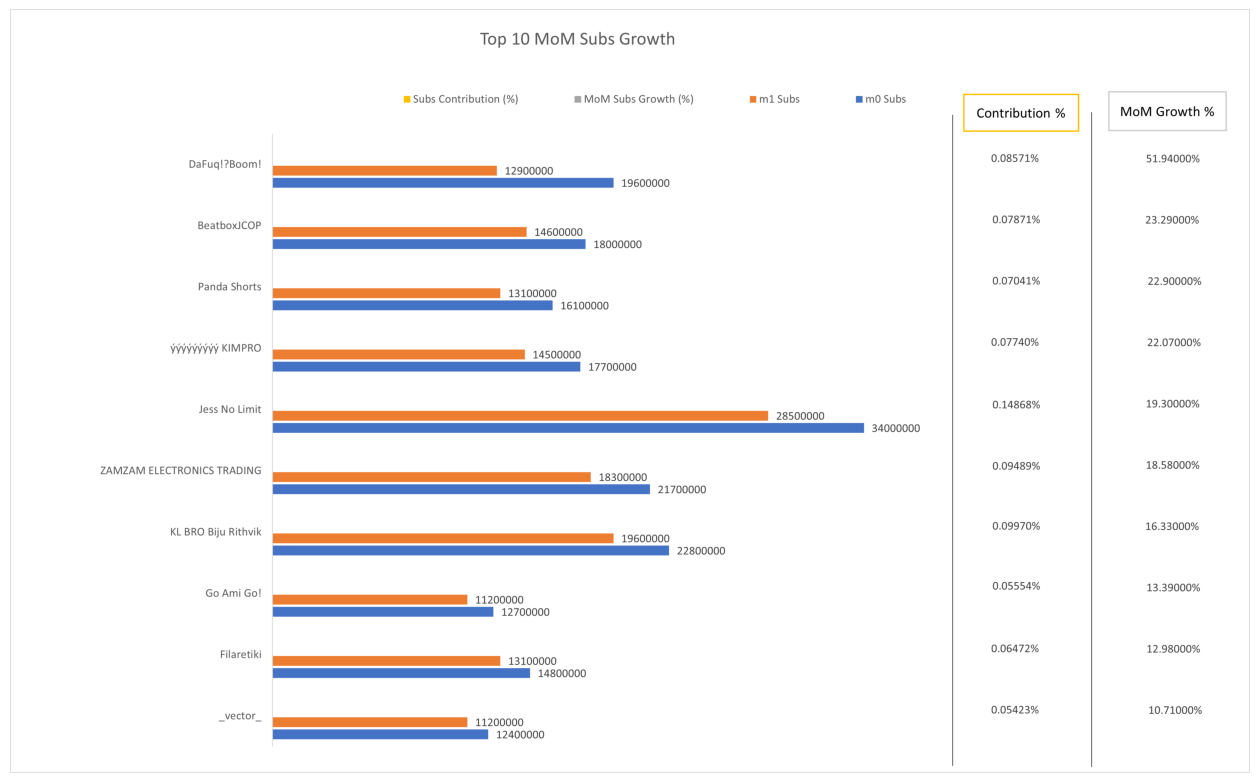

In [759]:
# Define the relative path to the image
image_path = '../Pictures/top10_mom_subs_growth.png'

# Load the image
img = mpimg.imread(image_path)

# Set figure size (width, height in inches)
plt.figure(figsize=(16, 14))  # Adjust the numbers for desired size

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off the axes for better display
plt.show()


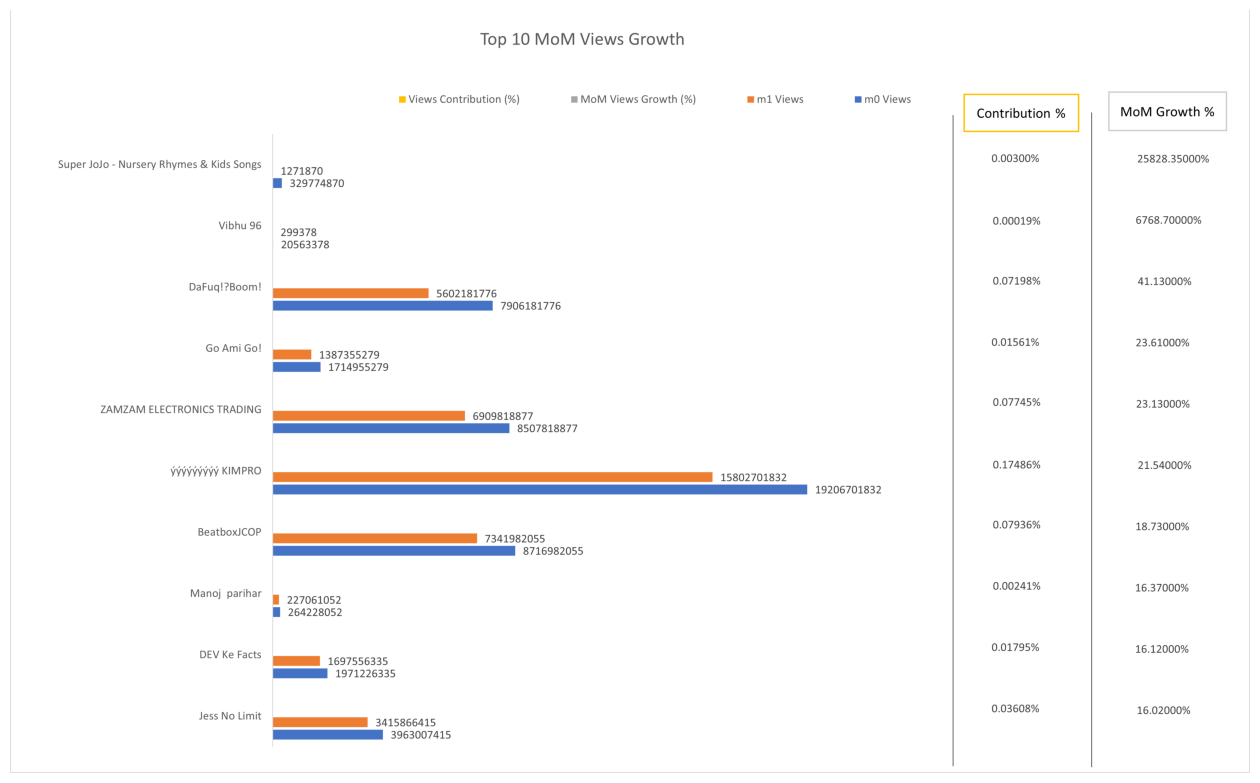

In [760]:
# Define the relative path to the image
image_path = '../Pictures/top10_mom_views_growth.png'

# Load the image
img = mpimg.imread(image_path)

# Set figure size (width, height in inches)
plt.figure(figsize=(16, 14))  # Adjust the numbers for desired size

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off the axes for better display
plt.show()

## Which channel has the most growth since they created their channel?

In [762]:
#Scatterplot umur channel + jumlah subs
#sama
#umur channel + jumlah views

### Converting and Merging Dates to Find Channel Age by Months

In [764]:
# Mapping month abbreviations to numerical values
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df_cleaned['month'] = df_cleaned['created_month'].map(month_mapping)

# Rename columns to match required names for date conversion
df_cleaned = df_cleaned.rename(columns={'created_year': 'year', 'created_date': 'day'})

# Calculate Julian Date using jdcal
df_cleaned['julian_day'] = df_cleaned.apply(
    lambda row: sum(gcal2jd(row['year'], row['month'], row['day'])), axis=1
)

# Calculate Julian date for the reference date: December 31, 2023
reference_julian_date = sum(gcal2jd(2023, 12, 31))

# Calculate the difference in Julian days from December 31, 2023
df_cleaned['channel_age_julian'] = reference_julian_date - df_cleaned['julian_day']

# Convert Julian day difference to months
average_days_per_month = 30.44  # Average number of days in a month
df_cleaned['channel_age_month'] = df_cleaned['channel_age_julian'] / average_days_per_month

### Quick Glance

In [766]:
# Prevent scientific notation for large numbers
pd.set_option('display.float_format', '{:,.0f}'.format)

# Find top 10 rows with the oldest channel age (month)
top_10_channel_age = df_cleaned.nlargest(10, 'channel_age_month')[['Youtuber','subscribers','video views','channel_age_month']]

# Print without index
print(top_10_channel_age.to_string(index=False))

       Youtuber  subscribers  video views  channel_age_month
        YouTube     36300000   3010784935                226
Michael Jackson     28200000  14412474625                222
          Apple     17300000   1026425106                222
   Ishtar Music     41400000  17608931161                219
          shane     19200000   4329121104                219
          Drake     28100000  15318895118                219
            CKN     18700000  12295637162                219
            CNN     15200000  14198154095                219
     Crazy Frog     14200000   7946322061                219
  Avril Lavigne     12400000   6202090191                219


### Channel Age vs Total Subscribers Visualization

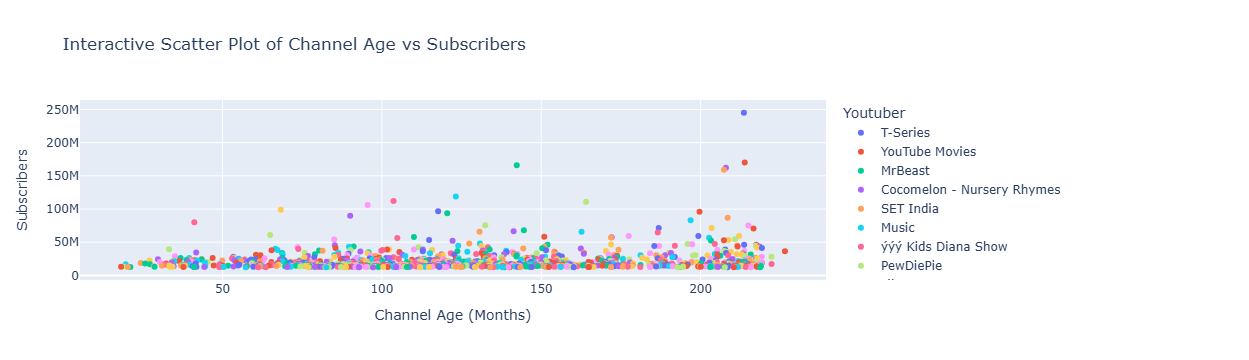

In [768]:
# Strip whitespace from column names (if necessary)
df_cleaned.columns = df_cleaned.columns.str.strip()

# Drop rows where 'channel_age_month' is 0 or below
df_cleaned = df_cleaned[df_cleaned['channel_age_month'] > 0]

# Create interactive scatter plot
fig = px.scatter(df_cleaned, 
                 x='channel_age_month', 
                 y='subscribers',
                 color="Youtuber",
                 hover_data=['Youtuber', 'subs_rank'],  # Add relevant columns
                 title='Interactive Scatter Plot of Channel Age vs Subscribers',
                 labels={'channel_age_month': 'Channel Age (Months)', 
                         'subscribers': 'Subscribers'})

# Show the plot
fig.show()

### Channel Age vs Total Views Visualization

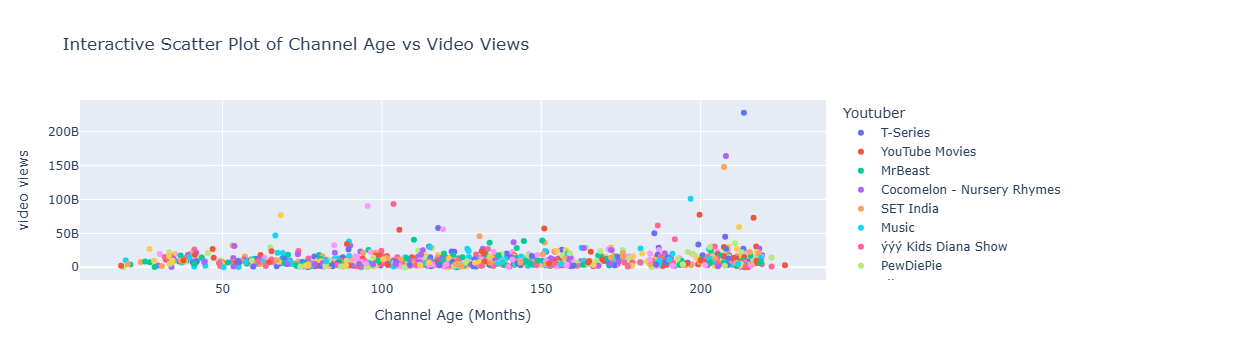

In [770]:
# Strip whitespace from column names (if necessary)
df_cleaned.columns = df_cleaned.columns.str.strip()

# Drop rows where 'channel_age_month' is 0 or below
df_cleaned = df_cleaned[df_cleaned['channel_age_month'] > 0]

# Create interactive scatter plot
fig = px.scatter(df_cleaned, 
                 x='channel_age_month', 
                 y='video views',
                 color="Youtuber",
                 hover_data=['Youtuber', 'channel_views_rank'],  # Add relevant columns
                 title='Interactive Scatter Plot of Channel Age vs Video Views',
                 labels={'channel_age_month': 'Channel Age (Months)', 
                         'subscribers': 'Subscribers'})

# Show the plot
fig.show()

## Category Trend

### Subscribers for each Category

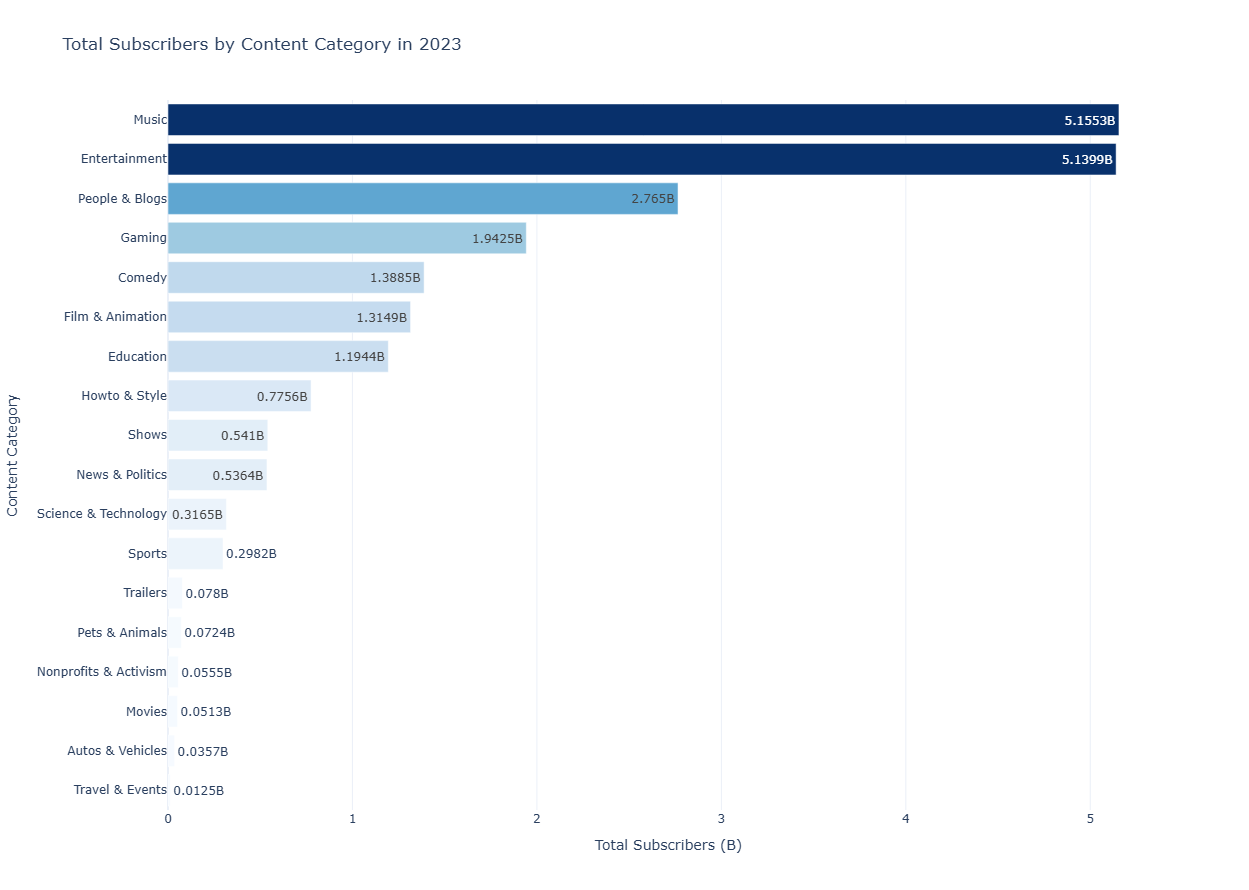

In [847]:
# Group by category and sum the subscribers
category_subscribers = df_cleaned.groupby('category')['subscribers'].sum().reset_index().sort_values(by='subscribers', ascending=True)

# Preprocess the data to represent subscribers in billions
category_subscribers['subscribers (B)'] = category_subscribers['subscribers'] / 1e9

# Filter out the "Unknown" category
category_subscribers = category_subscribers[category_subscribers['category'] != 'Unknown']

# Create an interactive vertical bar chart
fig = px.bar(
    category_subscribers,
    x='subscribers (B)',
    y='category',     
    title='Total Subscribers by Content Category in 2023',
    labels={'subscribers (B)': 'Total Subscribers (B)', 'category': 'Content Category'},
    text='subscribers (B)',  # Use the scaled column for text
    color='subscribers (B)',  # Optional: adds color intensity based on values
    color_continuous_scale='Blues'
)

# Update the text on the bars to display the number in billions with "B"
fig.update_traces(texttemplate='%{text:..1~f}B')

# Update hovertemplate to show the full number (not scaled, original 'subscribers')
fig.update_traces(
    hovertemplate='Category: %{y}<br>Subscribers: %{x:,.0f}'  # Use the full subscriber count on hover
)

# Set customdata to the original 'subscribers' column so it's accessible in hover
fig.update_traces(customdata=category_subscribers['subscribers'])

# Now, use customdata[0] to display the full number of subscribers during hover
fig.update_traces(hovertemplate='Category: %{y}<br>Subscribers: %{customdata:,.0f}')


fig.update_layout(
    coloraxis_showscale=False,  # Hide the color scale legend
    xaxis_title='Total Subscribers (B)',
    yaxis_title='Content Category',
    yaxis=dict(categoryorder='total ascending'),  # Ensure all categories appear
    template='plotly_white',
    height=350 + 30 * len(category_subscribers),  # Adjust height dynamically based on the number of categories
)

# Show the chart
fig.show()

### Viewers for each Category

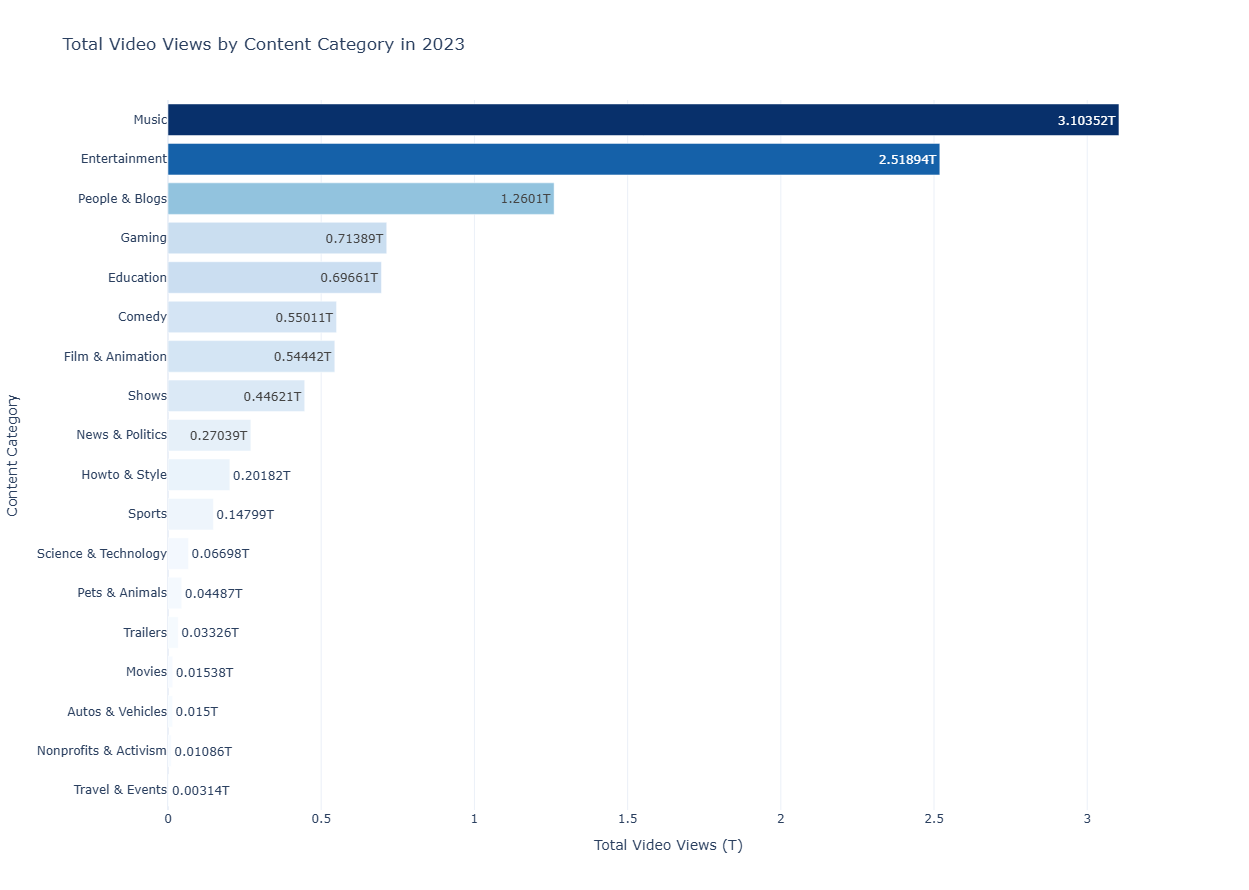

In [863]:
# Group by category and sum the video views
category_video_views = df_cleaned.groupby('category')['video views'].sum().reset_index().sort_values(by='video views', ascending=True)

# Preprocess the data to represent video views in trillions
category_video_views['video views (T)'] = category_video_views['video views'] / 1e12

# Filter out the "Unknown" category
category_video_views = category_video_views[category_video_views['category'] != 'Unknown']

# Create an interactive vertical bar chart
fig = px.bar(
    category_video_views,
    x='video views (T)',  # Using the scaled video views (in trillions)
    y='category',     
    title='Total Video Views by Content Category in 2023',
    labels={'video views (T)': 'Total Video Views (T)', 'category': 'Content Category'},
    text='video views (T)',  # Use the scaled column for text (in trillions)
    color='video views (T)',  # Optional: adds color intensity based on values
    color_continuous_scale='Blues'
)

# Update the text on the bars to display the number in trillions with "T"
fig.update_traces(texttemplate='%{text:.5~f}T')

# Update hovertemplate to show the full number (not scaled, original 'video views')
fig.update_traces(
    hovertemplate='Category: %{y}<br>Video Views: %{x:,.0f}'  # Use the full video views count on hover
)

# Set customdata to the original 'video views' column so it's accessible in hover
fig.update_traces(customdata=category_video_views['video views'])

# Now, use customdata[0] to display the full number of video views during hover
fig.update_traces(hovertemplate='Category: %{y}<br>Video Views: %{customdata:,.0f}')


fig.update_layout(
    coloraxis_showscale=False,  # Hide the color scale legend
    xaxis_title='Total Video Views (T)',
    yaxis_title='Content Category',
    yaxis=dict(categoryorder='total ascending'),  # Ensure all categories appear
    template='plotly_white',
    height=350 + 30 * len(category_video_views),  # Adjust height dynamically based on the number of categories
)

# Show the chart
fig.show()


### Uploads for each Category

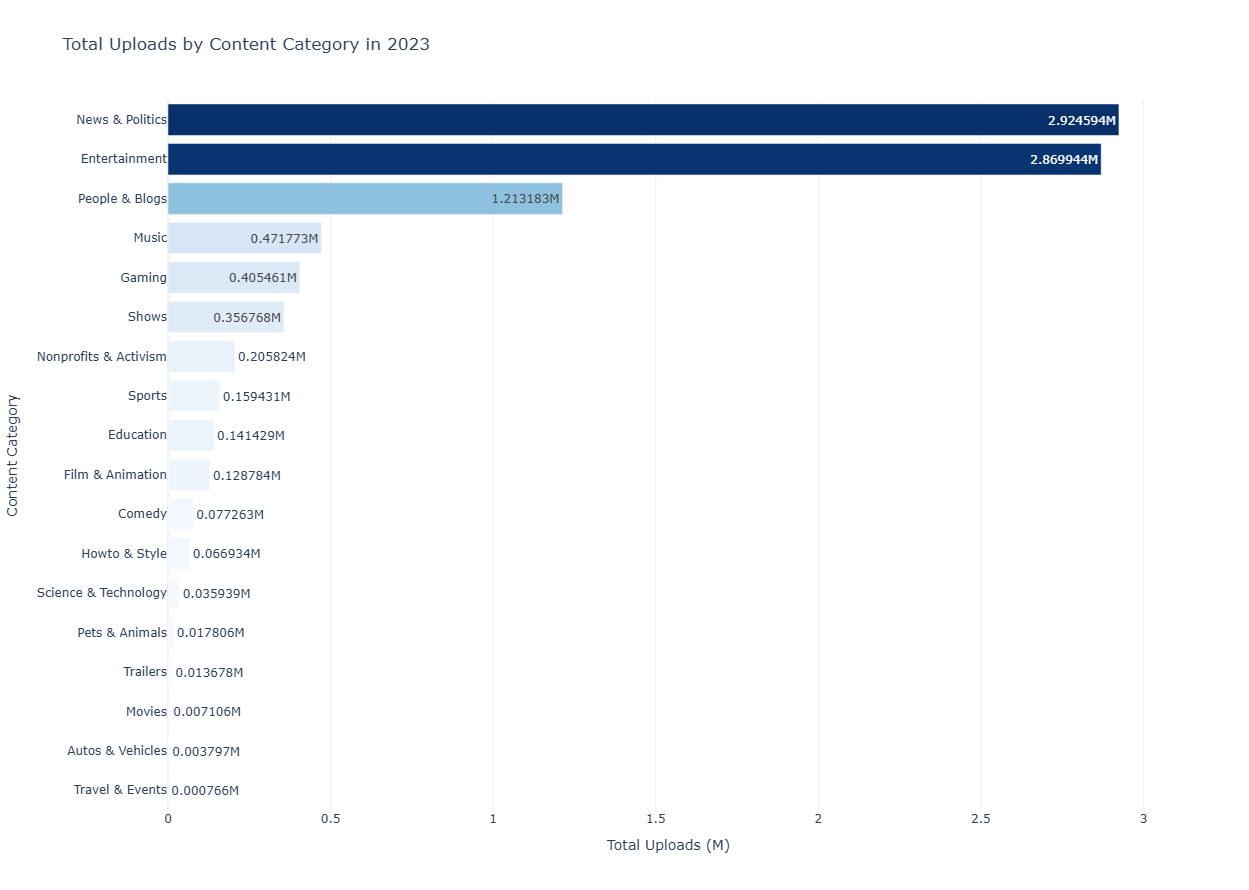

In [867]:
# Group by category and sum the uploads
category_uploads = df_cleaned.groupby('category')['uploads'].sum().reset_index().sort_values(by='uploads', ascending=True)

# Preprocess the data to represent uploads in millions
category_uploads['uploads (M)'] = category_uploads['uploads'] / 1e6  # Scale to millions

# Filter out the "Unknown" category
category_uploads = category_uploads[category_uploads['category'] != 'Unknown']

# Create an interactive vertical bar chart
fig = px.bar(
    category_uploads,
    x='uploads (M)',  # Using the scaled uploads (in millions)
    y='category',     
    title='Total Uploads by Content Category in 2023',
    labels={'uploads (M)': 'Total Uploads (M)', 'category': 'Content Category'},
    text='uploads (M)',  # Use the scaled column for text (in millions)
    color='uploads (M)',  # Optional: adds color intensity based on values
    color_continuous_scale='Blues'
)

# Update the text on the bars to display the number in millions with "M"
fig.update_traces(texttemplate='%{text:..3~f}M')  # Show 3 decimals

# Update hovertemplate to show the full number (not scaled, original 'uploads')
fig.update_traces(
    hovertemplate='Category: %{y}<br>Uploads: %{x:,.0f}'  # Use the full uploads count on hover
)

# Set customdata to the original 'uploads' column so it's accessible in hover
fig.update_traces(customdata=category_uploads['uploads'])

# Now, use customdata[0] to display the full number of uploads during hover
fig.update_traces(hovertemplate='Category: %{y}<br>Uploads: %{customdata:,.0f}')


fig.update_layout(
    coloraxis_showscale=False,  # Hide the color scale legend
    xaxis_title='Total Uploads (M)',  # Adjusted for millions
    yaxis_title='Content Category',
    yaxis=dict(categoryorder='total ascending'),  # Ensure all categories appear
    template='plotly_white',
    height=350 + 30 * len(category_uploads),  # Adjust height dynamically based on the number of categories
)

# Show the chart
fig.show()


# Gaining Insights

## Youtube Analytics

### Principles

In [814]:
# We are going to use monthly earnings, to find the average, it'd be (lowest monthly earnings + highest monthly earnings) / 2

# First, we need to create a new column for the average revenue:
df_cleaned['avg_monthly_earnings'] = (df_cleaned['lowest_monthly_earnings'] + df_cleaned['highest_monthly_earnings']) / 2

### Average Revenue vs Subs

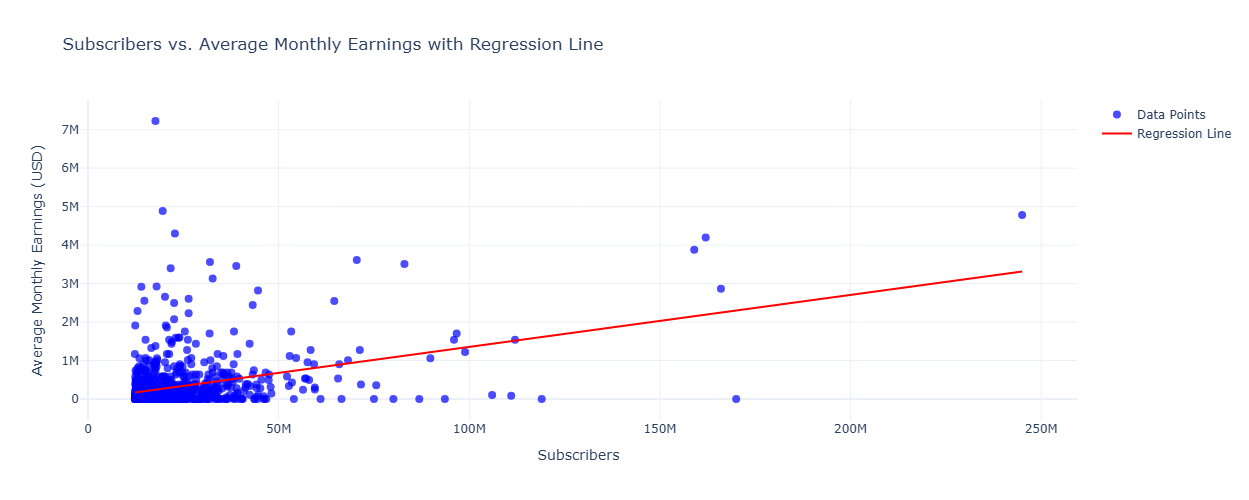

In [816]:

# Compute the regression line (y = mx + c)
x = df_cleaned['subscribers']
y = df_cleaned['avg_monthly_earnings']
m, c = np.polyfit(x, y, 1)  # Linear regression (degree=1)

# Regression line values
regression_y = m * x + c

# Create scatter plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=df_cleaned['subscribers'],
    y=df_cleaned['avg_monthly_earnings'],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.7),
    name='Data Points',
    hovertext = [
    f'Youtuber: {channel} | \nSubscribers: {sub} | \nEarnings: ${earn}'
        for channel, sub, earn in zip(
            df_cleaned['Youtuber'], 
            df_cleaned['subscribers'], 
            df_cleaned['avg_monthly_earnings']
        )
    ],
    hoverinfo='text'  # Display hovertext
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x,
    y=regression_y,
    mode='lines',
    line=dict(color='red', width=2),
    name='Regression Line',
    hoverinfo='skip'  # Skip hover for regression line to avoid redundancy
))

# Update layout
fig.update_layout(
    title='Subscribers vs. Average Monthly Earnings with Regression Line',
    xaxis_title='Subscribers',
    yaxis_title='Average Monthly Earnings (USD)',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

### Average Revenue vs Views

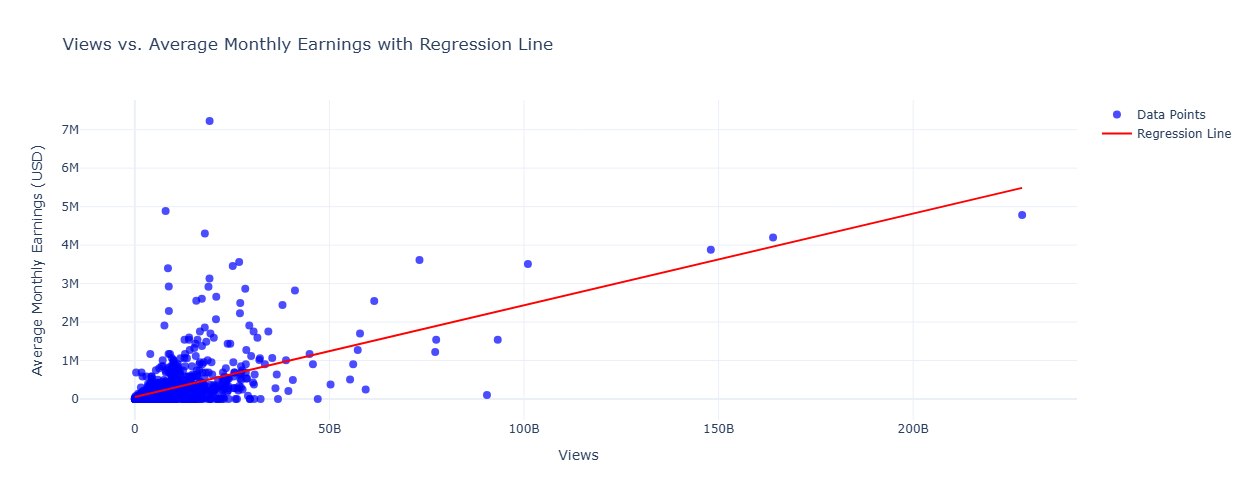

In [818]:

# Compute the regression line (y = mx + c)
x = df_cleaned['video views']
y = df_cleaned['avg_monthly_earnings']
m, c = np.polyfit(x, y, 1)  # Linear regression (degree=1)

# Regression line values
regression_y = m * x + c

# Create scatter plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=df_cleaned['video views'],
    y=df_cleaned['avg_monthly_earnings'],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.7),
    name='Data Points',
    hovertext = [
    f'Youtuber: {channel} | \nViews: {sub} | \nEarnings: ${earn}'
        for channel, sub, earn in zip(
            df_cleaned['Youtuber'], 
            df_cleaned['video views'], 
            df_cleaned['avg_monthly_earnings']
        )
    ],
    hoverinfo='text'  # Display hovertext
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x,
    y=regression_y,
    mode='lines',
    line=dict(color='red', width=2),
    name='Regression Line',
    hoverinfo='skip'  # Skip hover for regression line to avoid redundancy
))

# Update layout
fig.update_layout(
    title='Views vs. Average Monthly Earnings with Regression Line',
    xaxis_title='Views',
    yaxis_title='Average Monthly Earnings (USD)',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()

### Average Revenue vs Uploads

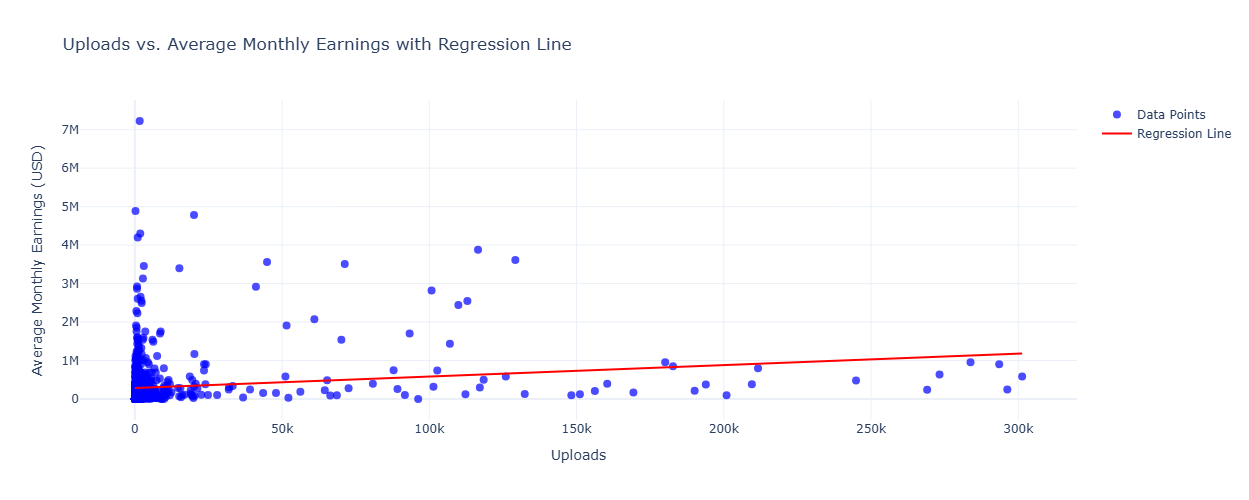

In [820]:
# Compute the regression line (y = mx + c)
x = df_cleaned['uploads']
y = df_cleaned['avg_monthly_earnings']
m, c = np.polyfit(x, y, 1)  # Linear regression (degree=1)

# Regression line values
regression_y = m * x + c

# Create scatter plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter(
    x=df_cleaned['uploads'],
    y=df_cleaned['avg_monthly_earnings'],
    mode='markers',
    marker=dict(size=8, color='blue', opacity=0.7),
    name='Data Points',
    hovertext = [
        f'Youtuber: {channel} | \nUploads: {sub} | \nEarnings: ${earn}'
        for channel, sub, earn in zip(
            df_cleaned['Youtuber'], 
            df_cleaned['uploads'],
            df_cleaned['avg_monthly_earnings']
        )
    ],
    hoverinfo='text'  # Display hovertext
))

# Add regression line
fig.add_trace(go.Scatter(
    x=x,
    y=regression_y,
    mode='lines',
    line=dict(color='red', width=2),
    name='Regression Line',
    hoverinfo='skip'  # Skip hover for regression line to avoid redundancy
))

# Update layout
fig.update_layout(
    title='Uploads vs. Average Monthly Earnings with Regression Line',
    xaxis_title='Uploads',
    yaxis_title='Average Monthly Earnings (USD)',
    template='plotly_white',
    width=800,
    height=500
)

fig.show()


## Regional Influence

In [822]:
# Bisa pakai trend country dan category

### Subscribers for Each Country

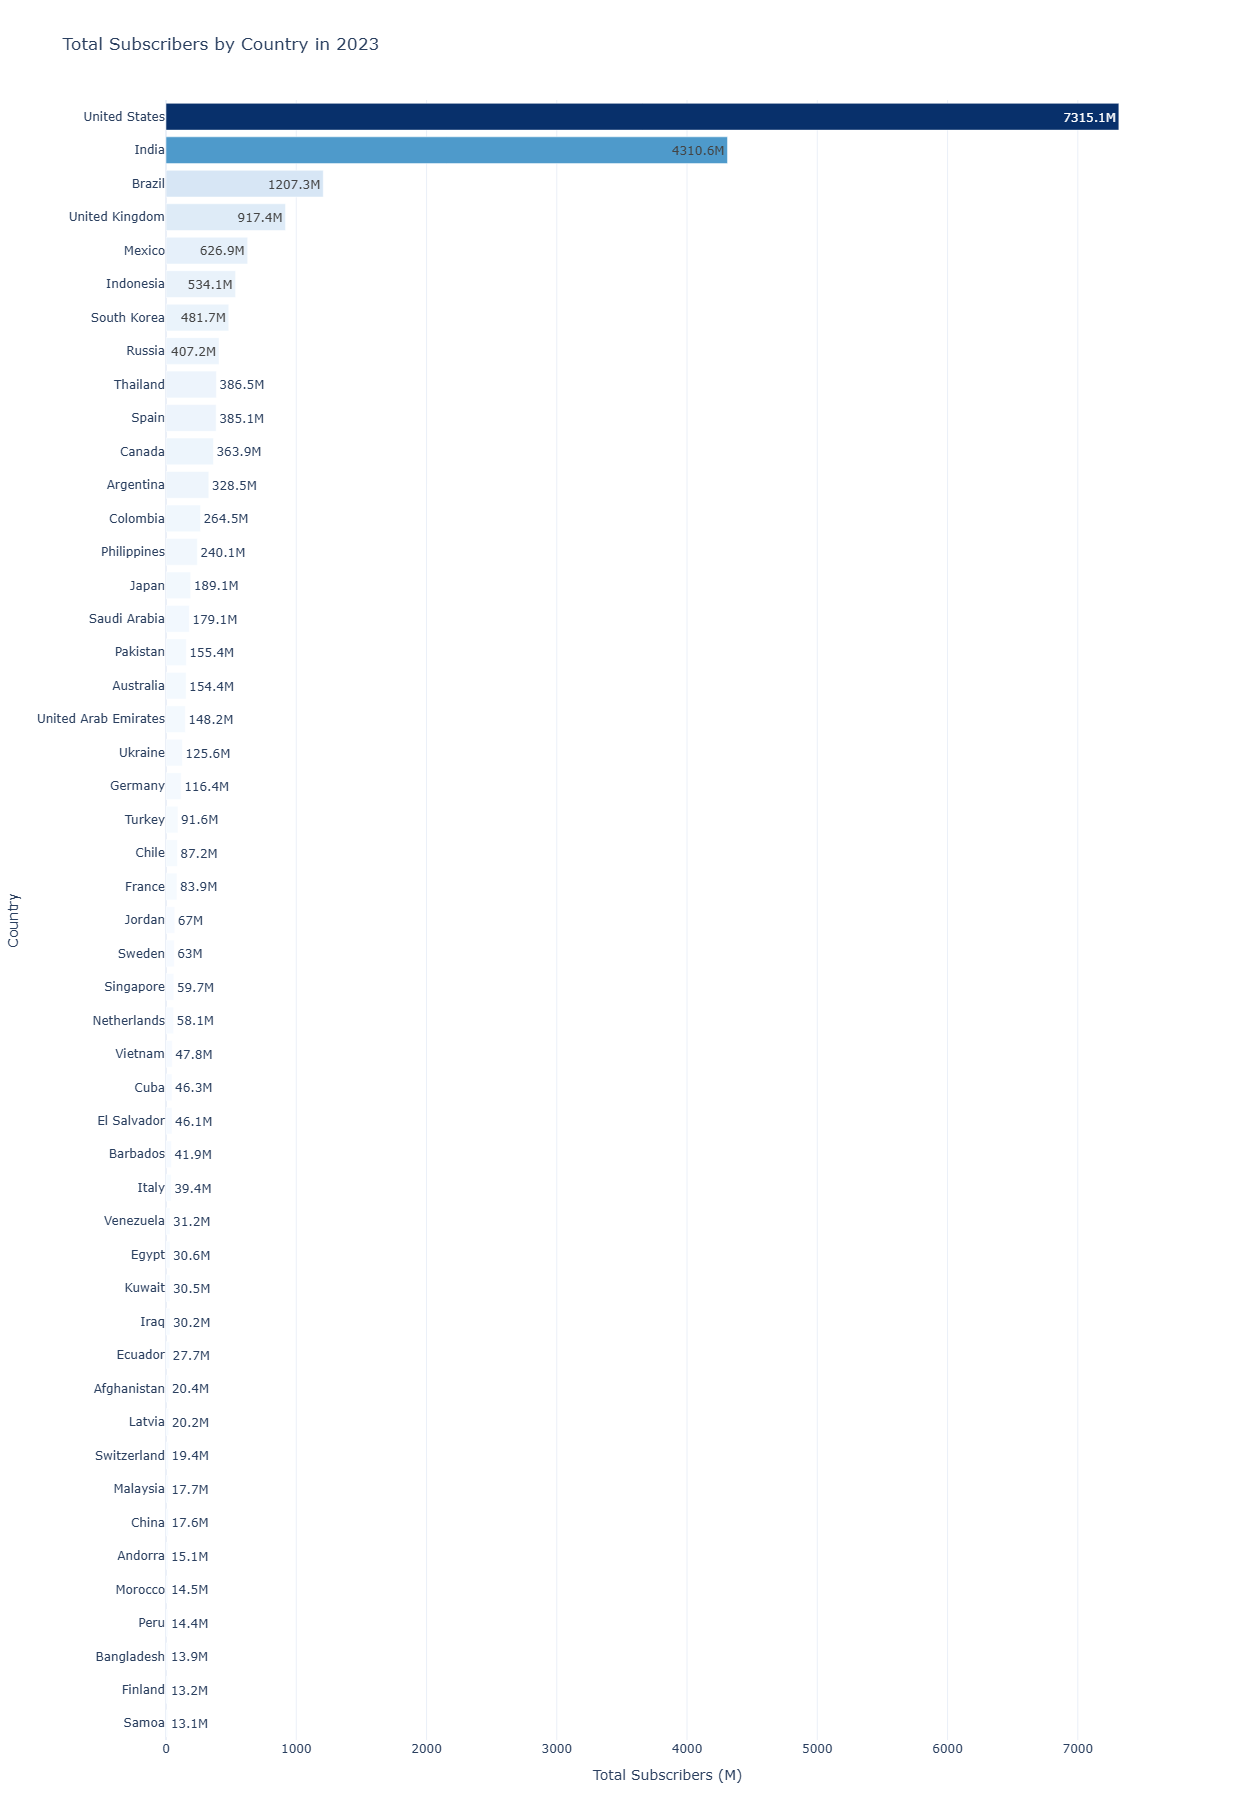

In [871]:
# Group by Country and sum the subscribers
country_subscribers = df_cleaned.groupby('Country')['subscribers'].sum().reset_index().sort_values(by='subscribers', ascending=True)

# Preprocess the data to represent subscribers in millions
country_subscribers['subscribers (M)'] = country_subscribers['subscribers'] / 1e6  # Convert to millions

# Filter out the "Unknown" Country
country_subscribers = country_subscribers[country_subscribers['Country'] != 'Unknown']

# Create an interactive vertical bar chart
fig = px.bar(
    country_subscribers,
    x='subscribers (M)',  # Use the new column representing subscribers in millions
    y='Country',  # Use 'Country' instead of 'category'     
    title='Total Subscribers by Country in 2023',
    labels={'subscribers (M)': 'Total Subscribers (M)', 'Country': 'Country'},  # Update label for 'Country'
    text='subscribers (M)',  # Use the scaled column for text
    color='subscribers (M)',  # Optional: adds color intensity based on values
    color_continuous_scale='Blues'
)

# Update the text on the bars to display the number in millions with "M"
fig.update_traces(texttemplate='%{text:..1~f}M')

# Update hovertemplate to show the full number (not scaled, original 'subscribers')
fig.update_traces(
    hovertemplate='Country: %{y}<br>Subscribers: %{x:,.0f}'  # Use 'Country' and full subscriber count on hover
)

# Set customdata to the original 'subscribers' column so it's accessible in hover
fig.update_traces(customdata=country_subscribers['subscribers'])

# Now, use customdata[0] to display the full number of subscribers during hover
fig.update_traces(hovertemplate='Country: %{y}<br>Subscribers: %{customdata:,.0f}')


fig.update_layout(
    coloraxis_showscale=False,  # Hide the color scale legend
    xaxis_title='Total Subscribers (M)',  # Title for the x-axis
    yaxis_title='Country',  # Title for the y-axis
    yaxis=dict(categoryorder='total ascending'),  # Ensure all countries appear
    template='plotly_white',
    height=350 + 30 * len(country_subscribers),  # Adjust height dynamically based on the number of countries
)

# Show the chart
fig.show()


### Viewers for each Country

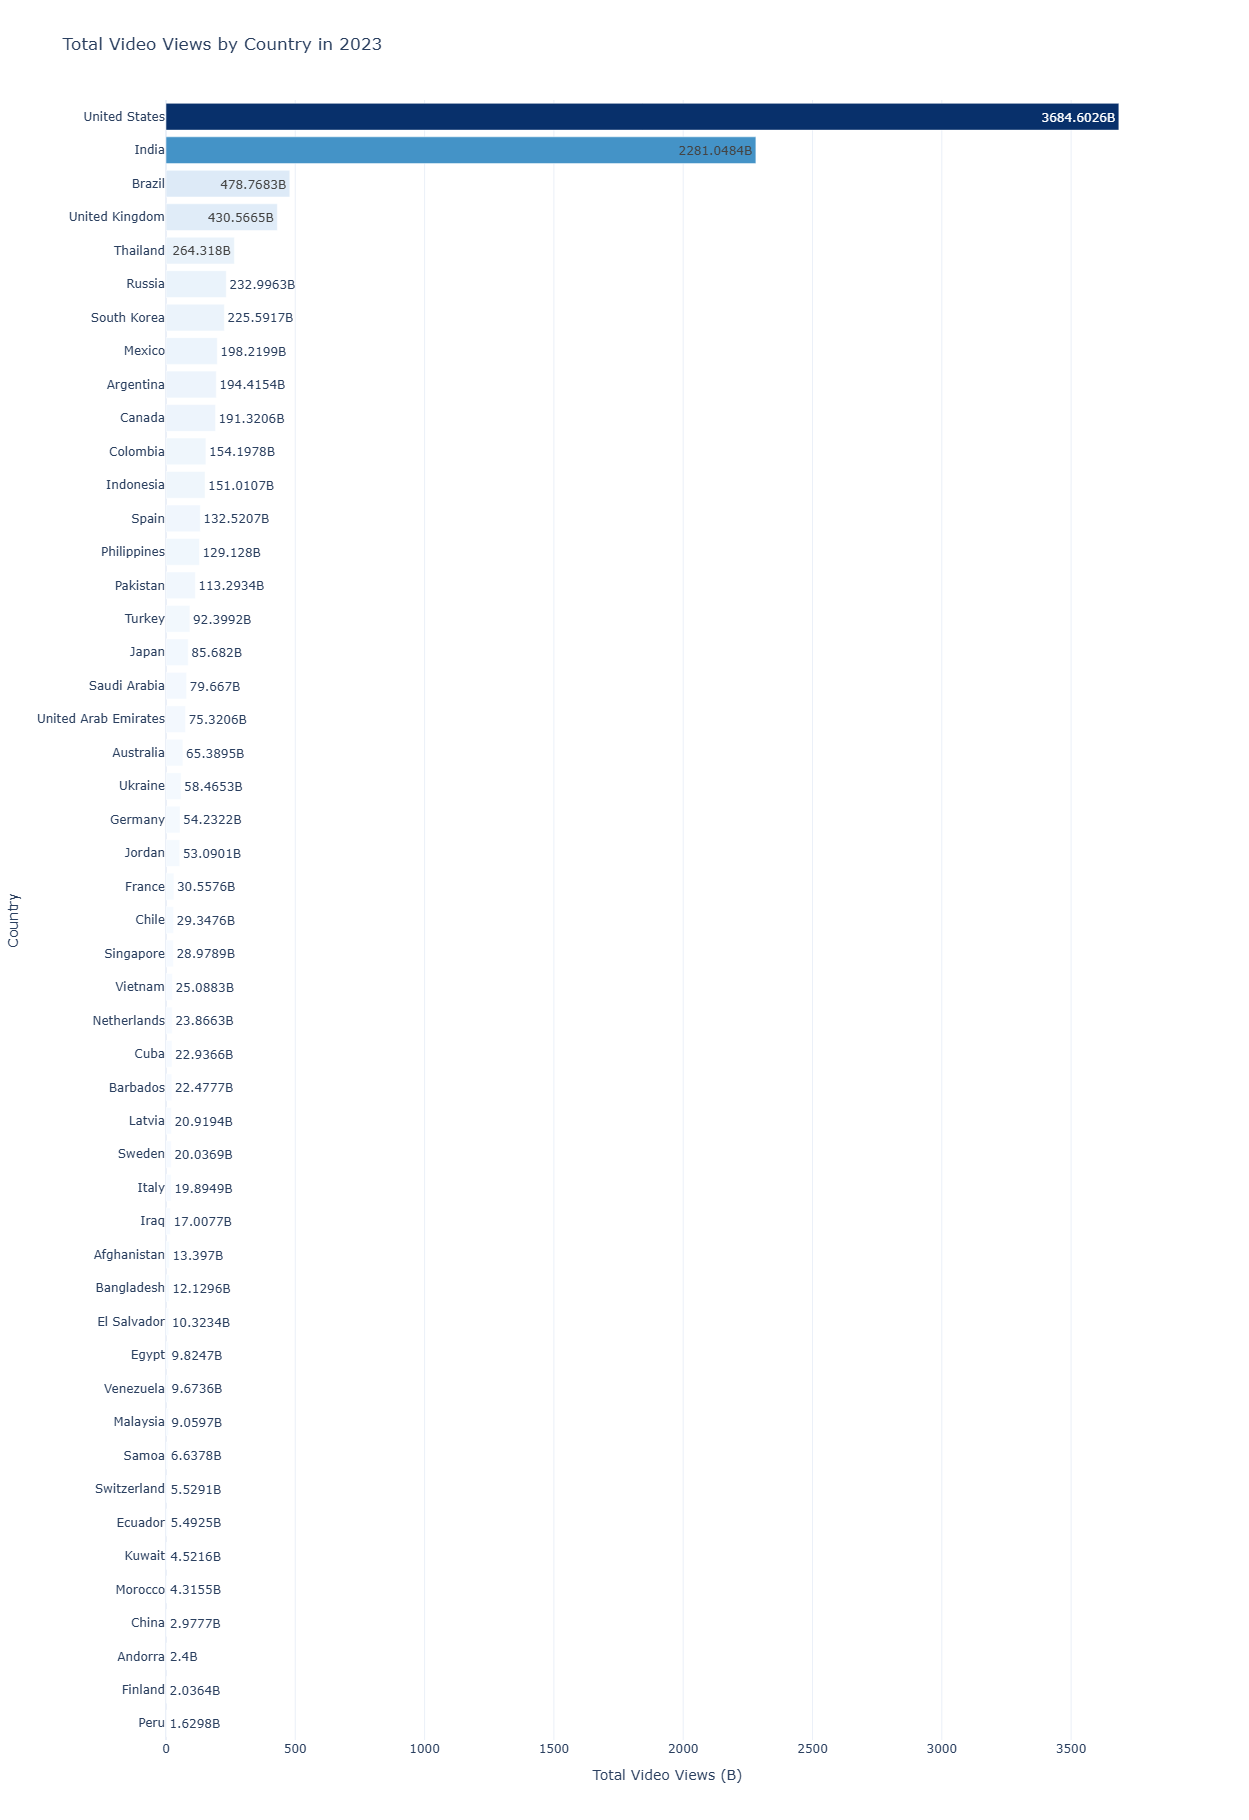

In [879]:
# Group by Country and sum the video views
country_views = df_cleaned.groupby('Country')['video views'].sum().reset_index().sort_values(by='video views', ascending=True)

# Preprocess the data to represent video views in billions
country_views['video views (B)'] = country_views['video views'] / 1e9  # Convert to billions

# Filter out the "Unknown" Country
country_views = country_views[country_views['Country'] != 'Unknown']

# Create an interactive vertical bar chart
fig = px.bar(
    country_views,
    x='video views (B)',  # Use the new column representing video views in billions
    y='Country',  # Use 'Country' instead of 'category'     
    title='Total Video Views by Country in 2023',
    labels={'video views (B)': 'Total Video Views (B)', 'Country': 'Country'},  # Update label for 'Country'
    text='video views (B)',  # Use the scaled column for text
    color='video views (B)',  # Optional: adds color intensity based on values
    color_continuous_scale='Blues'
)

# Update the text on the bars to display the number in billions with "B"
fig.update_traces(texttemplate='%{text:.4~f}B')

# Update hovertemplate to show the full number (not scaled, original 'video views')
fig.update_traces(
    hovertemplate='Country: %{y}<br>Video Views: %{x:,.0f}'  # Use 'Country' and full video view count on hover
)

# Set customdata to the original 'video views' column so it's accessible in hover
fig.update_traces(customdata=country_views['video views'])

# Now, use customdata[0] to display the full number of video views during hover
fig.update_traces(hovertemplate='Country: %{y}<br>Video Views: %{customdata:,.0f}')


fig.update_layout(
    coloraxis_showscale=False,  # Hide the color scale legend
    xaxis_title='Total Video Views (B)',  # Title for the x-axis
    yaxis_title='Country',  # Title for the y-axis
    yaxis=dict(categoryorder='total ascending'),  # Ensure all countries appear
    template='plotly_white',
    height=350 + 30 * len(country_views),  # Adjust height dynamically based on the number of countries
)

# Show the chart
fig.show()


### Uploads for each Country

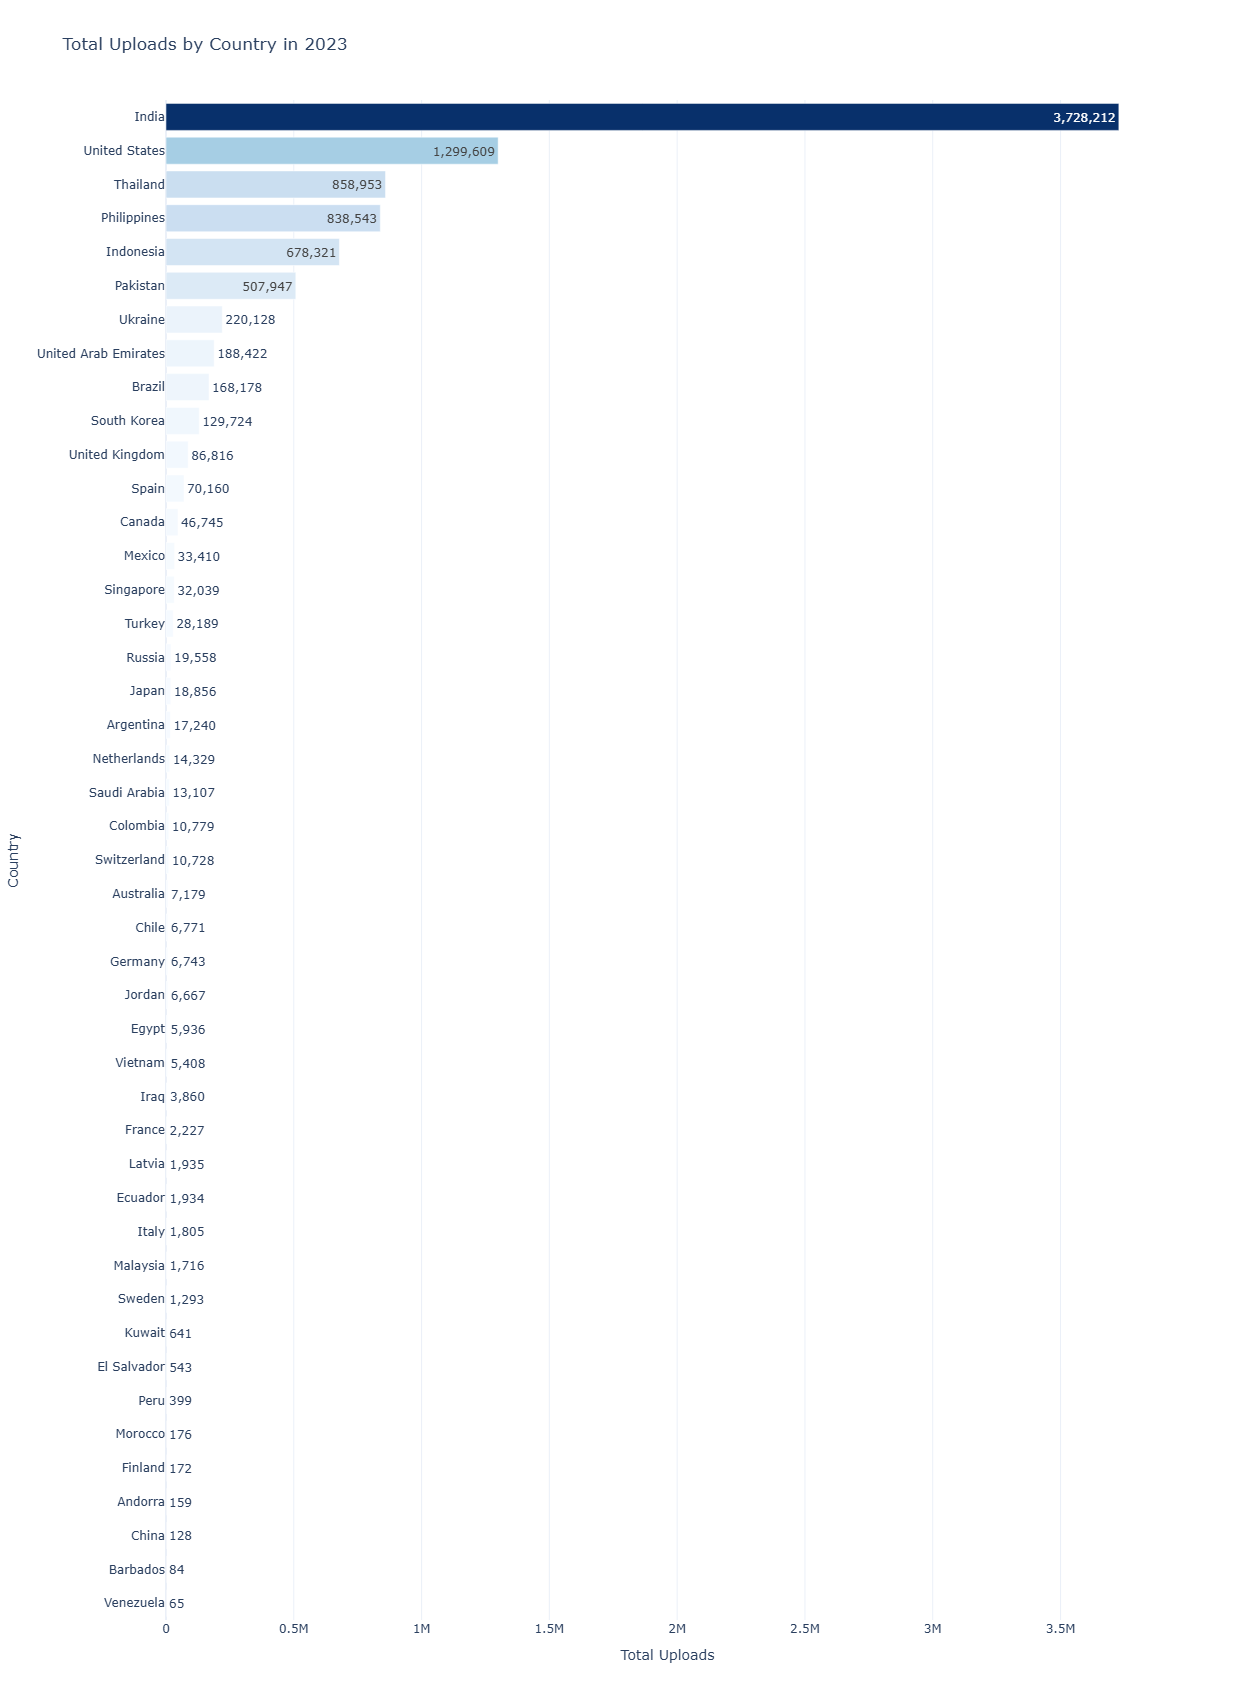

In [921]:
# Group by Country and sum the uploads
country_uploads = df_cleaned.groupby('Country')['uploads'].sum().reset_index().sort_values(by='uploads', ascending=True)

# Filter out countries with fewer than 50 uploads and the "Unknown" category
country_uploads = country_uploads[(country_uploads['uploads'] >= 15) & (country_uploads['Country'] != 'Unknown')]

# Create an interactive vertical bar chart
fig = px.bar(
    country_uploads,
    x='uploads',  # Use the raw 'uploads' values without scaling
    y='Country',  # Use 'Country' for the y-axis     
    title='Total Uploads by Country in 2023',
    labels={'uploads': 'Total Uploads', 'Country': 'Country'},  # Label for 'Country' and 'Uploads'
    text='uploads',  # Display raw uploads number on bars
    color='uploads',  # Color intensity based on raw upload numbers
    color_continuous_scale='Blues'
)

# Update the text on the bars to display the raw number of uploads
fig.update_traces(texttemplate='%{text:,.0f}')  # Show the full number without scaling

# Update hovertemplate to show the full number of uploads
fig.update_traces(
    hovertemplate='Country: %{y}<br>Uploads: %{x:,.0f}'  # Show full upload count on hover
)

# Set customdata to the original 'uploads' column so it's accessible in hover
fig.update_traces(customdata=country_uploads['uploads'])

# Now, use customdata[0] to display the full number of uploads during hover
fig.update_traces(hovertemplate='Country: %{y}<br>Uploads: %{customdata:,.0f}')


fig.update_layout(
    coloraxis_showscale=False,  # Hide the color scale legend
    xaxis_title='Total Uploads',  # Title for the x-axis
    yaxis_title='Country',  # Title for the y-axis
    yaxis=dict(categoryorder='total ascending'),  # Ensure all countries appear
    template='plotly_white',
    height=350 + 30 * len(country_uploads),  # Adjust height dynamically based on the number of countries
)

# Show the chart
fig.show()


### Categories for Each Country

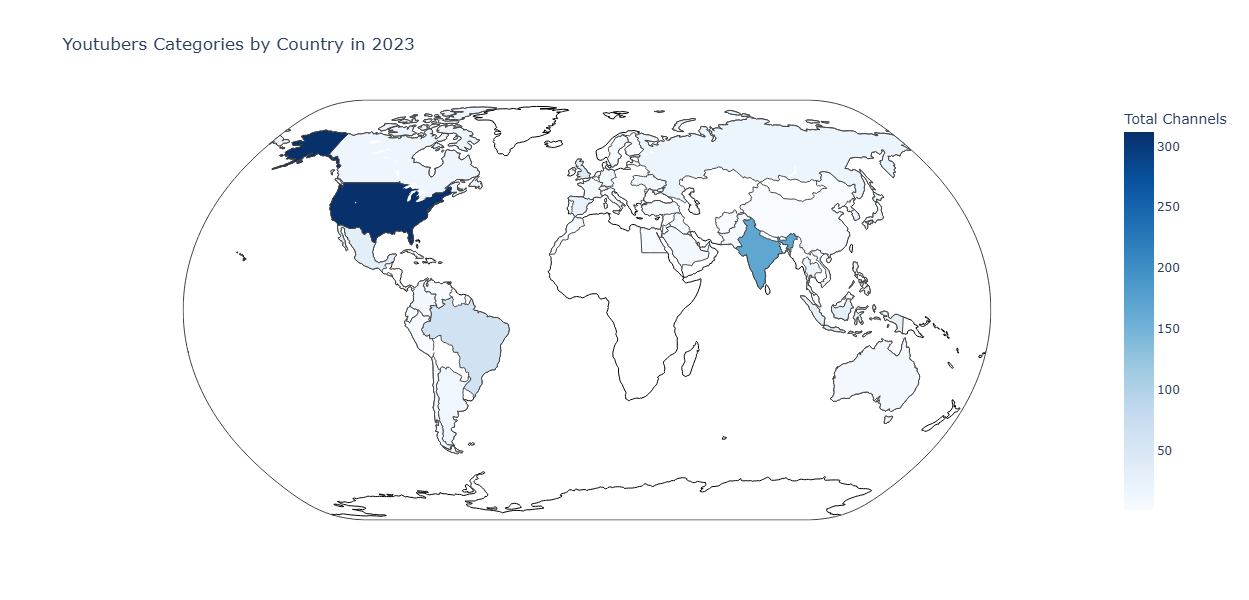

In [830]:
# Group by country and category, then count occurrences
country_categories = df_cleaned.groupby(['Country', 'category']).size().reset_index(name='count')

# Pivot the data to have categories as columns and countries as rows
country_category_pivot = country_categories.pivot(index='Country', columns='category', values='count').fillna(0)

# Calculate total channels per category for sorting
category_totals = country_category_pivot.sum(axis=0).sort_values(ascending=False)

# Reorder columns based on category totals
country_category_pivot = country_category_pivot[category_totals.index]

# Reset index to make country a column
country_category_pivot.reset_index(inplace=True)

# Create a column for hover data sorted by total channel count
country_category_pivot['hover_data'] = country_category_pivot.apply(
    lambda row: "<br>".join([f"{col}: {int(row[col])} Channels" for col in category_totals.index if row[col] > 0]),
    axis=1
)

# Calculate the total channels, ensuring only numeric columns are summed
numeric_columns = category_totals.index
country_category_pivot['total_channels'] = country_category_pivot[numeric_columns].sum(axis=1)

# Create a choropleth map
fig = px.choropleth(
    country_category_pivot,
    locations='Country',  # Use country as location
    locationmode='country names',  # Country names for location mode
    color='total_channels',  # Use total channels for coloring
    hover_name='Country',
    hover_data={'hover_data': False},  # Disable hover_data in the panel
    title="Youtubers Categories by Country in 2023",
    labels={'total_channels': 'Total Channels'},
    color_continuous_scale='Blues'
)

# Customize hover using hovertemplate
fig.update_traces(
    customdata=country_category_pivot['hover_data'],
    hovertemplate="<b>%{location}</b><br>%{customdata}"  # Display only the custom hover data
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth"),
    template='plotly_white',
    height=600,
)

# Show the map
fig.show()


# References

## Data Source

In [ ]:
# https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

## Filling NA according to Datatypes:

In [ ]:
# Reference and inspiration taken from here: https://stackoverflow.com/questions/59802226/fillna-depending-on-column-type-function

## Seaborn Chart documentation:

In [105]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html

## Determining Which Chart to Use for Youtube Analytics:

In [ ]:
# https://datavizcatalogue.com/blog/selecting-a-chart-based-on-the-number-of-variables/

## Linear Regression using Numpy

In [ ]:
# In the line m, c = np.polyfit(x, y, 1), we are using the numpy.polyfit function to perform a linear regression 
# on the data points x (independent variable) and y (dependent variable).

# m: This is the slope of the regression line (the coefficient for x), which tells you how much the dependent variable y changes for each unit change in x.
# c: This is the y-intercept of the regression line (the constant), which represents the value of y when x is zero.
# The np.polyfit(x, y, 1) function finds the best-fitting line (a degree-1 polynomial) to the data points by minimizing the sum of squared differences 
# between the observed values and the line.

# So, we are determining the values of m (slope) and c (intercept) by fitting the data to a linear model. (As we wrote it as m, c = )

# To clarify:

# The 1 in np.polyfit(x, y, 1) signifies that we are fitting a linear model, as a degree-1 polynomial corresponds to a straight line: y = mx + c.

# More detailed documentations below:

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [ ]:
# https://www.kdnuggets.com/linear-regression-from-scratch-with-numpy

## Geospatial Map Hover Data Brief Explanation

In [ ]:
# A Breakdown of this part:

# Create a column for hover data sorted by total channel count
# country_category_pivot['hover_data'] = country_category_pivot.apply(
#    lambda row: "<br>".join([f"{col}: {int(row[col])} Channels" for col in category_totals.index if row[col] > 0]),
#    axis=1
# )

In [ ]:
# 1. country_category_pivot.apply(...):

# This method applies a function to each row (since axis=1 is specified) of the DataFrame country_category_pivot.

# 2. Lambda Function:

# The lambda function defines what will happen for each row in the DataFrame
                                            
# 3. List Comprehension:

# "<br>".join([...]): Combines the results of the list comprehension into a single string, with each item separated by a line break (<br>).

# [f"{col}: {int(row[col])} Channels" for col in category_totals.index if row[col] > 0]:
# Iterates through the column names (col) in the sorted order (category_totals.index).
# For each column, it checks if the value in that column for the current row (row[col]) is greater than 0.
# If true, it formats the string as "Category: N Channels", where Category is the column name and N is the count from that column (converted to an integer).